# Bem vindo ao Laboratório ARIMA 

Comece conhecendo a interface do Jupyter Notebook disponível em "Help/User Interface Tour"

Para uma introdução básica ao funcionamento do Jupiter Notebook [clique aqui](https://letscode-academy.com/blog/introducao-ao-jupyter-notebook/#abrindo) (pule a parte de instalação, 5 minutos de leitura bastam)

Caso queira se aprofundar um pouco mais, [clique aqui (en-US)](https://mybinder.org/v2/gh/jvns/pandas-cookbook/master), espere página carregar e dirija-se ao 'CookBook'; ou ainda [aqui (pt-BR)](https://www.digitalocean.com/community/tutorials/como-configurar-o-jupyter-notebook-com-python-3-no-ubuntu-18-04-pt)


É comum, antes de iniciar o código, declarar todas as bibliotecas que serão utilizadas, para informar à outros programadores quais os pré-requisitos para o programa.
Nesse caso, utilizando o Binder, não há necessidade de instalar nenhuma delas.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.dates as mdates

- **Numpy**: utilizada para efetuar todo tipo de cáculo matemático, da mais simples divisão com valor inteiro, até multiplicação de matrizes, passando pelas integrais
- **Pandas**: consagrada por importar arquivos csv, excel, html, entre outros; é baseado no Numpy e faz operações vetorizadas 
- **Matplotlib**: é capaz de fazer gráficos com poucas linhas, e permite a alteração de diversas variáveis de estilo que o excel, por exemplo, não permite 
- **Statsmodel**: no contexto estatístico, apresentar modelos já preparados para aplicação. Com documentação farta nos permite, por exemplo, usar o ARIMA

## Acessando dados de um diretório

O diretório é a localização dentro do computador (como uma pasta) que guarda os arquivos necessários para o código funcionar assim como ele próprio. Nesse caso, o diretório se parece com esse: 
![](imagens/repositorio.png)


 A forma de acessar esses arquivos é usando **funções** como a `plt.plot()`

![](imagens/funcao.jpg)

Nesse exemplo temos:
- A biblioteca que contém a função (`plt`)
- A própria função (`plot()`)
- Os argumentos posicionais, que são necessários para que a função opere corretamente, têm que ser postos nessa ordem
- Argumentos de palavra-chave (keyword arguments) são opcionais e tem convenções vindas da própria biblioteca, como cores, dimensões e tipo de gráfico

A seguir, usaremos `pd.read_csv()` para abrir os dados dos radares, mas antes, vamos olhar como um csv ( _Comma Separated Values_ ) ou seja, um arquivo de valores separados por vírgula, realmente é:

![](imagens/csv.jpg)

In [18]:
df1=pd.read_csv("amostra_4326.csv",
                decimal='.')
display(df1.head())

,Unnamed: 0,Data,Hora,Local,Faixa,EspecieVeiculo,ClasseVeiculo,Comprimento(m),VelocidadePontual,Descricao,Latitude,Longitude
0,0,20180508,235603,4326,5,1.0,0.0,3.2,142.0,Av. Alcântara Machado (Centro/Bairro) a mais 1...,-23.549602,-46.605001
1,1,20180508,235607,4326,4,0.0,0.0,0.0,0.0,Av. Alcântara Machado (Centro/Bairro) a mais 1...,-23.549602,-46.605001
2,2,20180508,235607,4326,4,0.0,0.0,0.0,0.0,Av. Alcântara Machado (Centro/Bairro) a mais 1...,-23.549602,-46.605001
3,3,20180508,235608,4326,5,0.0,1.0,19.1,119.0,Av. Alcântara Machado (Centro/Bairro) a mais 1...,-23.549602,-46.605001
4,4,20180508,235643,4326,2,1.0,0.0,3.2,42.0,Av. Alcântara Machado (Centro/Bairro) a mais 1...,-23.549602,-46.605001


É assim que os dados estão organizados, podemos obter mais informações a partir deles:

`df.info()` nos fornece as colunas, qual o tipo de dados delas (float e int) e o uso de memória (33.6MB)

`df.describe()` sumariza as estatísticas das colunas de valores numéricos:  quantidade, desvio padrão, média e quartis 

`df.columns` é um método, não termina com parêntesis (normalmente informam atributos da tabela), nos dá as colunas

`df.shape` outro método, fornece as dimensões da tabela

In [19]:
print(df1.info())
print('================================================')
print(df1[['VelocidadePontual','Comprimento(m)']].describe())
print('================================================')
print(df1.columns)
print('================================================')
print(df1.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29921 entries, 0 to 29920
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         29921 non-null  int64  
 1   Data               29921 non-null  int64  
 2   Hora               29921 non-null  int64  
 3   Local              29921 non-null  int64  
 4   Faixa              29921 non-null  int64  
 5   EspecieVeiculo     29921 non-null  float64
 6   ClasseVeiculo      29921 non-null  float64
 7   Comprimento(m)     29921 non-null  float64
 8   VelocidadePontual  29921 non-null  float64
 9   Descricao          29921 non-null  object 
 10  Latitude           29921 non-null  float64
 11  Longitude          29921 non-null  float64
dtypes: float64(6), int64(5), object(1)
memory usage: 2.7+ MB
None
       VelocidadePontual  Comprimento(m)
count       29921.000000    29921.000000
mean           86.447512        3.494633
std            25.715320     

Pelo fato dos arquivos serem muito grandes, eles estão divididos em 2, logo os juntaremos

In [20]:
# Importa os csvs agrupados

df2=pd.read_csv("radares_20180906.csv",
                sep=';',
                decimal='.')
df2['Data']=pd.to_datetime(df2['Data'])

# faça o mesmo para o outro arquivo "radares_20180921.csv"

df3=pd.read_csv("radares_20180921.csv",
                sep=';',
                decimal='.')
df3['Data']=pd.to_datetime(df3['Data'])

Aqui foi possível ver os Argumentos de palavra-chave em ação. O csv aqui é separado por semi-vígulas, e temos que informar isso à função (`sep = ';'`)

In [21]:
# Transforma as datas em dias consecutivos, para transformá-los em dados de manipulação mais fácil
df2['Data']=df2['Data'].apply(lambda x: x.replace(month=1, day=2, hour=x.hour, minute=x.minute, second=x.second))
df3['Data']=df3['Data'].apply(lambda x: x.replace(month=1, day=3, hour=x.hour, minute=x.minute, second=x.second))

## Agrupando os dois dias num único dataframe
Um "Dataframe" é um formato de apresentação de dados muito parecido com o do Excel, mas pensado para as necessidade e limitações da Ciência de Dados

Nessa etapa, iremos junta-los e dar uma olhada.


In [22]:
# Consolida os dois dias em um unico dataframe
df = pd.concat([df2,df3],axis=0).reset_index(drop=True)

display(df), display(df.head(n=5));
# Troque o valor de n para ver quantas linhas do topo desejar, o padrão é n=5

,Data,Local,VelMed,Qtde
0,2018-01-02 00:00:00,2400.0,116.181818,11
1,2018-01-02 00:00:00,2401.0,58.666667,9
2,2018-01-02 00:00:00,2402.0,97.250000,5
3,2018-01-02 00:00:00,2403.0,101.000000,6
4,2018-01-02 00:00:00,2404.0,107.857143,7
...,...,...,...,...
1101638,2018-01-03 23:57:00,7166.0,144.333333,6
1101639,2018-01-03 23:57:00,7168.0,115.428571,7
1101640,2018-01-03 23:57:00,7172.0,67.000000,13
1101641,2018-01-03 23:57:00,7176.0,183.000000,1


,Data,Local,VelMed,Qtde
0,2018-01-02,2400.0,116.181818,11
1,2018-01-02,2401.0,58.666667,9
2,2018-01-02,2402.0,97.250000,5
3,2018-01-02,2403.0,101.000000,6
4,2018-01-02,2404.0,107.857143,7


Com 4 colunas e mais de 1 milhão de linhas, aí estão os nossos dados

## Plotando o seu primeiro gráfico

O histograma que faremos a seguir concentra a frequência que uma variável ocorre em uma barra.

No eixo x estão as velocidades, e no y a frequência com que cada uma delas ocorre

C:\Users\Win\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Win\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


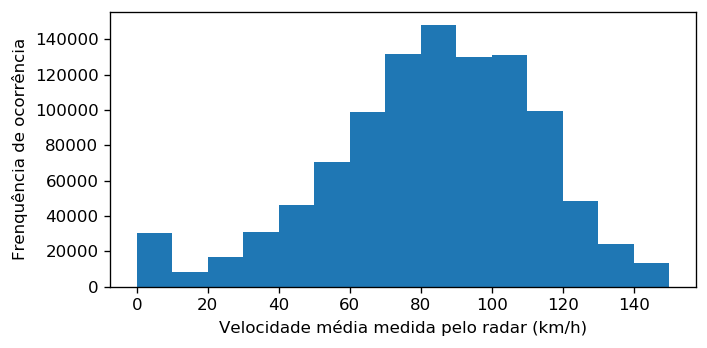

In [23]:
plt.rcParams.update({'figure.figsize':(6,3), 'figure.dpi':120})

plt.hist(df['VelMed'],bins=15, range=(0,150)) # com df['VelMed'], estamos selecionando apenas essa coluna das 4
plt.ylabel('Frenquência de ocorrência')
plt.xlabel('Velocidade média medida pelo radar (km/h)')
plt.tight_layout()
plt.show()

No nosso dataset, é possível concluir que as velocidade médias se concentram entre 70 e 120 km/h (mais de 500000 veículos!)

Mas, caso queira tirar o argumento `range=(0,150)`, mostra que há ocorrências de velocidades de 1000 km/h! Claramente são falhas de medição do radar, os famosos **outliers**

Para lidar com eles, existe outro gráfico, o boxplot, formado pelo primeiro e terceiro quartil (limites da caixa) e pela mediana (risco do meio). Os valores fora das hastes são outliers

Para mais do boxplot, [cliquei aqui](http://www.portalaction.com.br/estatistica-basica/31-boxplot)

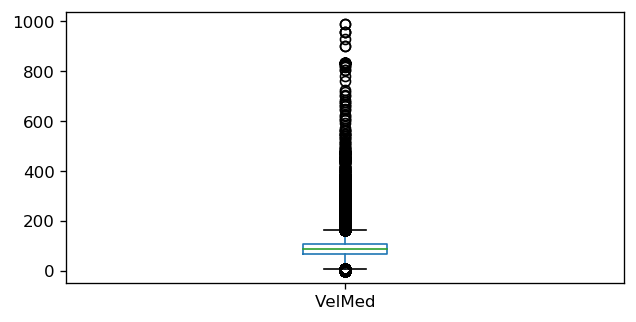

In [24]:
df['VelMed'].plot(kind='box');
plt.show()

Apesar de parecerem muitos os outliers, que são velocidades negativas ou acima de 170 km/h, temos tantos dados que esses poucos absurdos não serão problema

<a id='cell'></a>
## Seleção do radar e hora a serem previstos

A partir de agora vamos pensar no modelo

Pensando ter uma previsão mais precisa, vamos modelar o tráfego de apenas uma via, a Av. Alcântara Machado, sentido Centro/Bairro. Com os seus dados históricos, tentaremos estimar o fluxo dos próximos 45 minutos (que já é uma grande dificuldade)

Para tal, selecionamos o radar referente à essa via ( _4326_ ) e dividimos os dataframe em 2 partes:
- Treino: sobre os quais o modelo se baseia para as previsçoes;
- Teste: que serve para validação, avaliar qual o erro dessa previsão




In [39]:
# Seleciona um único radar e horário para realizar a previsão
radar = 4326
hora = '13:00:00'

df_rad = df[df['Local']==4326].reset_index(drop=True)

division = df_rad.loc[df_rad['Data']=='2018-01-03 ' + hora].index[0]
start = division - 100

# Separa em treino e validação
treino = df_rad.loc[start:division]
teste  = df_rad.loc[division:]

> _Ao fim desse roteiro será recomendado para você testar a previsão em outros horários do dia. A variável que deverá ser alterada é `hora`, para qualquer hora cheia_



## Determinação dos parâmetros do ARIMA

### Checar se a série é estacionária

A série estacionária é condição _sine qua non_ para a aplicação do método; caso nao for, é possível utilizar a diferenciação da série - quantas vezes forem necessárias -  para torná-la estacionária. Escolhido o radar, observa-se se a série pode ser considerada estacionária (p-value inferior a 0.05) por meio do teste de Dickey-Fuller aumentado (ADF).

In [26]:
result = adfuller(df_rad.Qtde)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -3.223283
p-value: 0.018676


Por isso, não será realizado nenhuma diferenciação. No entanto, faremos a validação visual para certificar-nos do resultado apontado pelo teste ADF.

### Validação Visual

Para validar visualmente o resultado do teste ADF, plotamos funções de autocorrelação para a série original, com diferenciação de primeira e de segunda ordem. 

Espera-se que a série original tenha uma curva da Função de Autocorrelação (ACF) decrescente enquanto as outras possuam uma queda abrupta pois, segundo o teste ADF, elas já serão diferenciadas.

Wall time: 4 ms


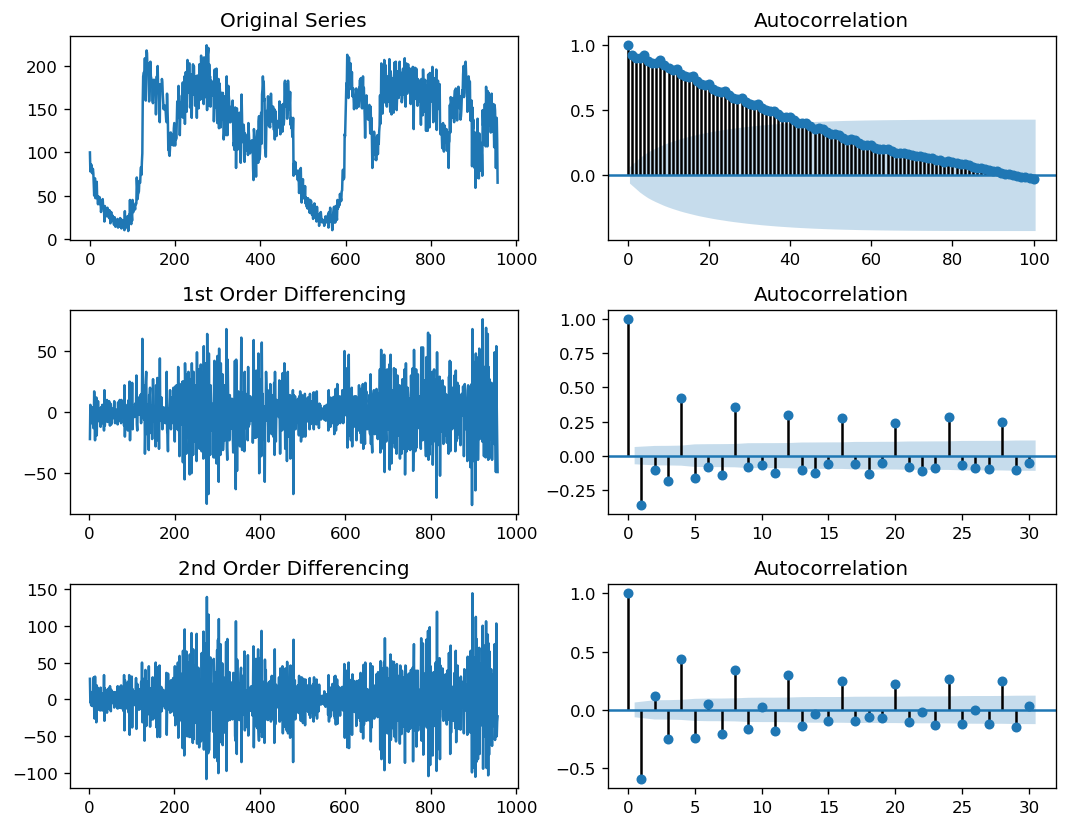

In [34]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
fig, axes = plt.subplots(3, 2, sharex=False)

# Original Series
axes[0, 0].plot(df_rad.Qtde); axes[0, 0].set_title('Original Series')
plot_acf(df_rad.Qtde, ax=axes[0, 1], alpha=0.05, lags=100)

# 1st Differencing
axes[1, 0].plot(df_rad.Qtde.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df_rad.Qtde.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df_rad.Qtde.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df_rad.Qtde.diff().diff().dropna(), ax=axes[2, 1])

plt.tight_layout()
plt.show()

Os plots mostram que na primeira diferenciação, a série já se torna super diferenciada (o que pode ser notado pela queda abrupta na curva de autocorrelação). Isso indica que o parâmetro d=0 é realmente o ideal

### Ordem da Auto-Regressão

Por se tratar de uma regressão feita sobre os valores anteriores da série, deve-se ver até que ponto há correlação entre os pontos de observação. Isso é definido através da Função de Autocorrelação Parcial (PACF).

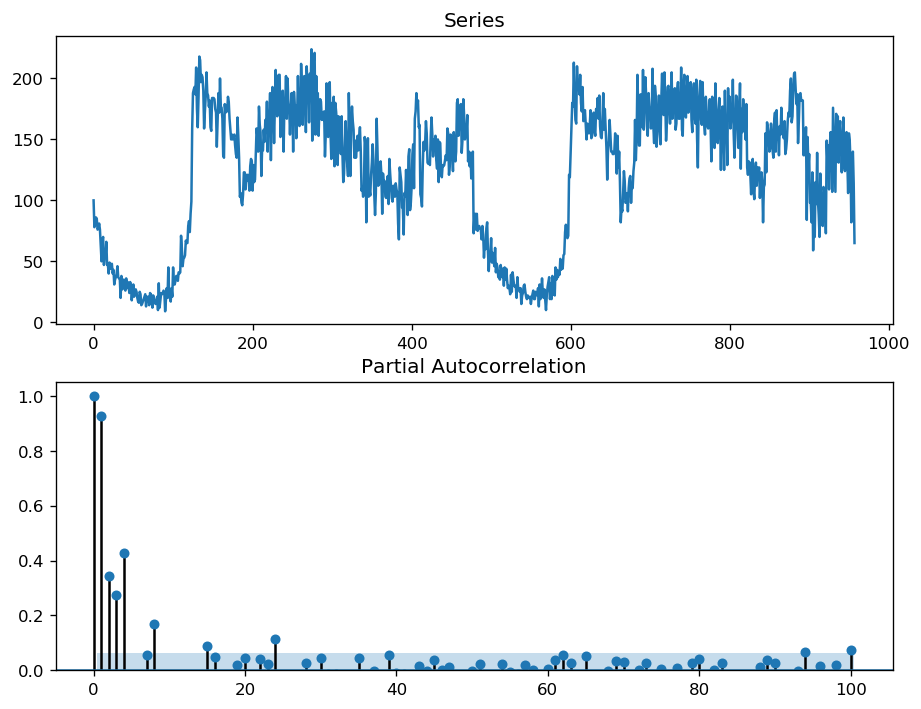

In [28]:
# PACF
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

fig, axes = plt.subplots(2, 1, sharex=False)
axes[0].plot(df_rad.Qtde); axes[0].set_title('Series')
axes[1].set(ylim=(0,1.05))
plot_pacf(df_rad.Qtde, ax=axes[1], lags= 100)

plt.show()

Pelo gráfico devemos observar até que ponto a correlação está acima do nível de confiança, adotado em 95%.

Desconsiderando o primeiro (já que a autocorrelação parcial com o primeiro ponto da série é consigo mesmo, ou seja, sempre PACF=1), podemos ver que os quatro pontos seguintes possuem correlação acima do nível de confiança exigido (delimitado pela área azul). Por isso, utilizaremos p=4.

### Ordem da Média-Móvel

O plot da ACF fornece um threshold, um limite, superior para o ordem do modelo MA. 

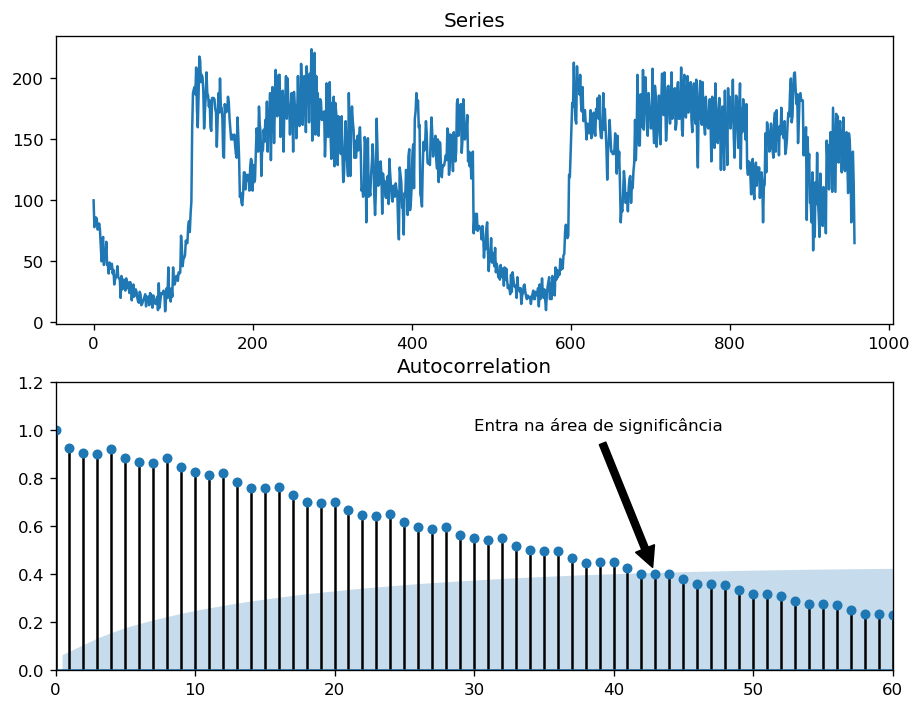

In [29]:
fig, axes = plt.subplots(2,1, sharex=False)


axes[0].plot(df_rad.Qtde); axes[0].set_title('Series')
axes[1].set(ylim=(0,1.2), xlim=(0,60))
plot_acf(df_rad.Qtde, ax=axes[1], lags=100)


plt.annotate('Entra na área de significância', xytext=(30, 1),xy=(43,0.4),arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

A autocorrelação decai muito lentamente para a série em questão. 


Isso nos daria um treshold máximo da ordem de 40. No entanto, vale ressaltar que esse valor pode ser muito elevado, então deve-se sempre levar em conta tanto o fator de **performance do modelo** quanto **custo computacional**, evitando o uso de parâmetros muito elevados em quaisquer modelos.

Nos modelos ARIMA, a componente de média móvel raramente ultrapassa 3 ou 4. Por isso, utilizaremos o valor 1 para manter o modelo simples.

## Construção do modelo e previsão

In [30]:
# De_para para mostrar a localizacao do radar
de_para = pd.read_csv('de_para.csv')

Vamos criar nosso modelo com os parâmetros que encontramos (p,d,q) = (4,0,1)

In [41]:
p = 4 #Autoregressao
d = 0 #Diferenciacao
q = 1 #MediaMovel
steps = 15 # Steps a serem previstos

teste=teste[:steps]

# Istancia o modelo e faz o fit no treino
model = ARIMA(treino['Qtde'],order=(p,d,q))
model_fit=model.fit(disp=-1)

# Realiza FORECAST
fc, se, conf = model_fit.forecast(steps, alpha=0.05)  # 95% conf

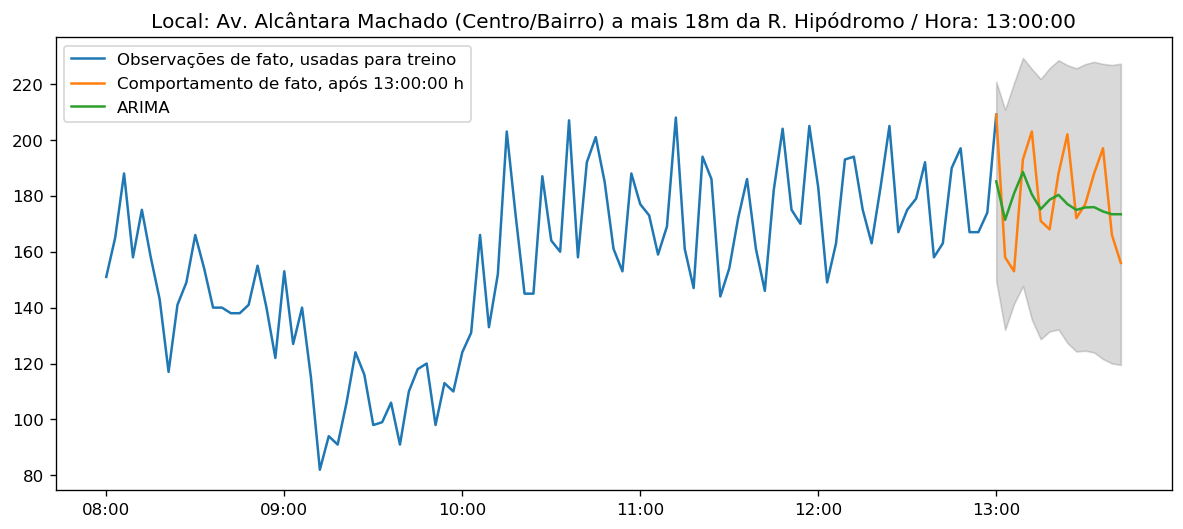

In [42]:
fc_series = pd.Series(fc, index=teste.index)

lower_series = pd.Series(conf[:, 0], index=teste.Data)
upper_series = pd.Series(conf[:, 1], index=teste.Data)

# Plot
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(treino['Data'], treino['Qtde'], label='Observações de fato, usadas para treino')
ax.plot(teste['Data'], teste['Qtde'], label='Comportamento de fato, após %s h'%hora)
ax.plot(teste['Data'], fc_series, label='ARIMA')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.fill_between(lower_series.index, lower_series, upper_series, 
                  color='k', alpha=.15)
plt.title('Local: '+str(de_para.loc[de_para['Local']==radar,'Descricao'].reset_index(drop=True)[0])+' / Hora: '+hora)
plt.legend(loc='upper left', fontsize=10)
plt.show()

A legenda para as linhas do gráfico é autoexplicativa. 

Ademais, a área cinza é o intervalo de confiança da previsão,lembre-se, 95%, ou seja, a probabilidade da previsão estar *fora* dessa área é de 5%. A confiança pode ser alterada mudando o valor em `forecast`->`alpha=x` com x entre 0 e 1 (duas células acima)

## Considerações Finais

Conseguimos, por fim, estimar o tráfego da via em questão no horário desejado, mas é possível prever em outras condições como, por exemplo, em outra [hora](#cell) do dia (tente para as 19:00 e 12:00, veja as diferenças das previsões)


- **A qualidade da previsão é comprometida quando o comportamento que queremos prever (dados de teste) é muito mais variável do que o comportamento que o algoritmo está observando (dados de treino)**, casos em que há variação muito abrupta do volume de tráfego. Assim, o treino reduzido (100 lags) torna a previsão impossível.

- Outro fato observado é que **as previsões para radares com menor volume de tráfego são mais imprecisas**. Isso deve-se ao fato que a **variação relativa** nesses locais é mais crítica que a variação em pontos mais movimentados. Por exemplo, num cenário onde o volume médio é de _20 veículos a cada 3 minutos_ , a variação de 2 veículos representa um incremento de **10%**. Caso o volume médio fosse de _2 veículos a cada 3 minutos_ , a alteração seria de **100%**. Isso torna a série histórica mais volátil e, portanto, mais difícil de se prever.

# Obrigado
